# Diabetes Prediction ML Model

This notebook explores the creation of a suitable model to predict whether a person has diabetes or not by training a model using a patient dataset.

The dataset used for this model can be found at :

https://www.kaggle.com/datasets/mathchi/diabetes-data-set

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

### Content
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

* *Pregnancies:* Number of times pregnant
* *Glucose:* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* *BloodPressure:* Diastolic blood pressure (mm Hg)
* *SkinThickness:* Triceps skin fold thickness (mm)
* *Insulin:* 2-Hour serum insulin (mu U/ml)
* *BMI:* Body mass index (weight in kg/(height in m)^2)
* *DiabetesPedigreeFunction:* Diabetes pedigree function
* *Age:* Age (years)
* *Outcome:* Class variable (0 or 1)

### Importing all the necessary data manipulation and visualization libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the dataset

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [6]:
data.shape

(768, 9)

### Splitting the dataset into dependent and independent variables (x and y)

In [7]:
x = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [8]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
# Just importing this library to avoid warnings
import warnings
warnings.filterwarnings("ignore")

### Visaulizing the dataset

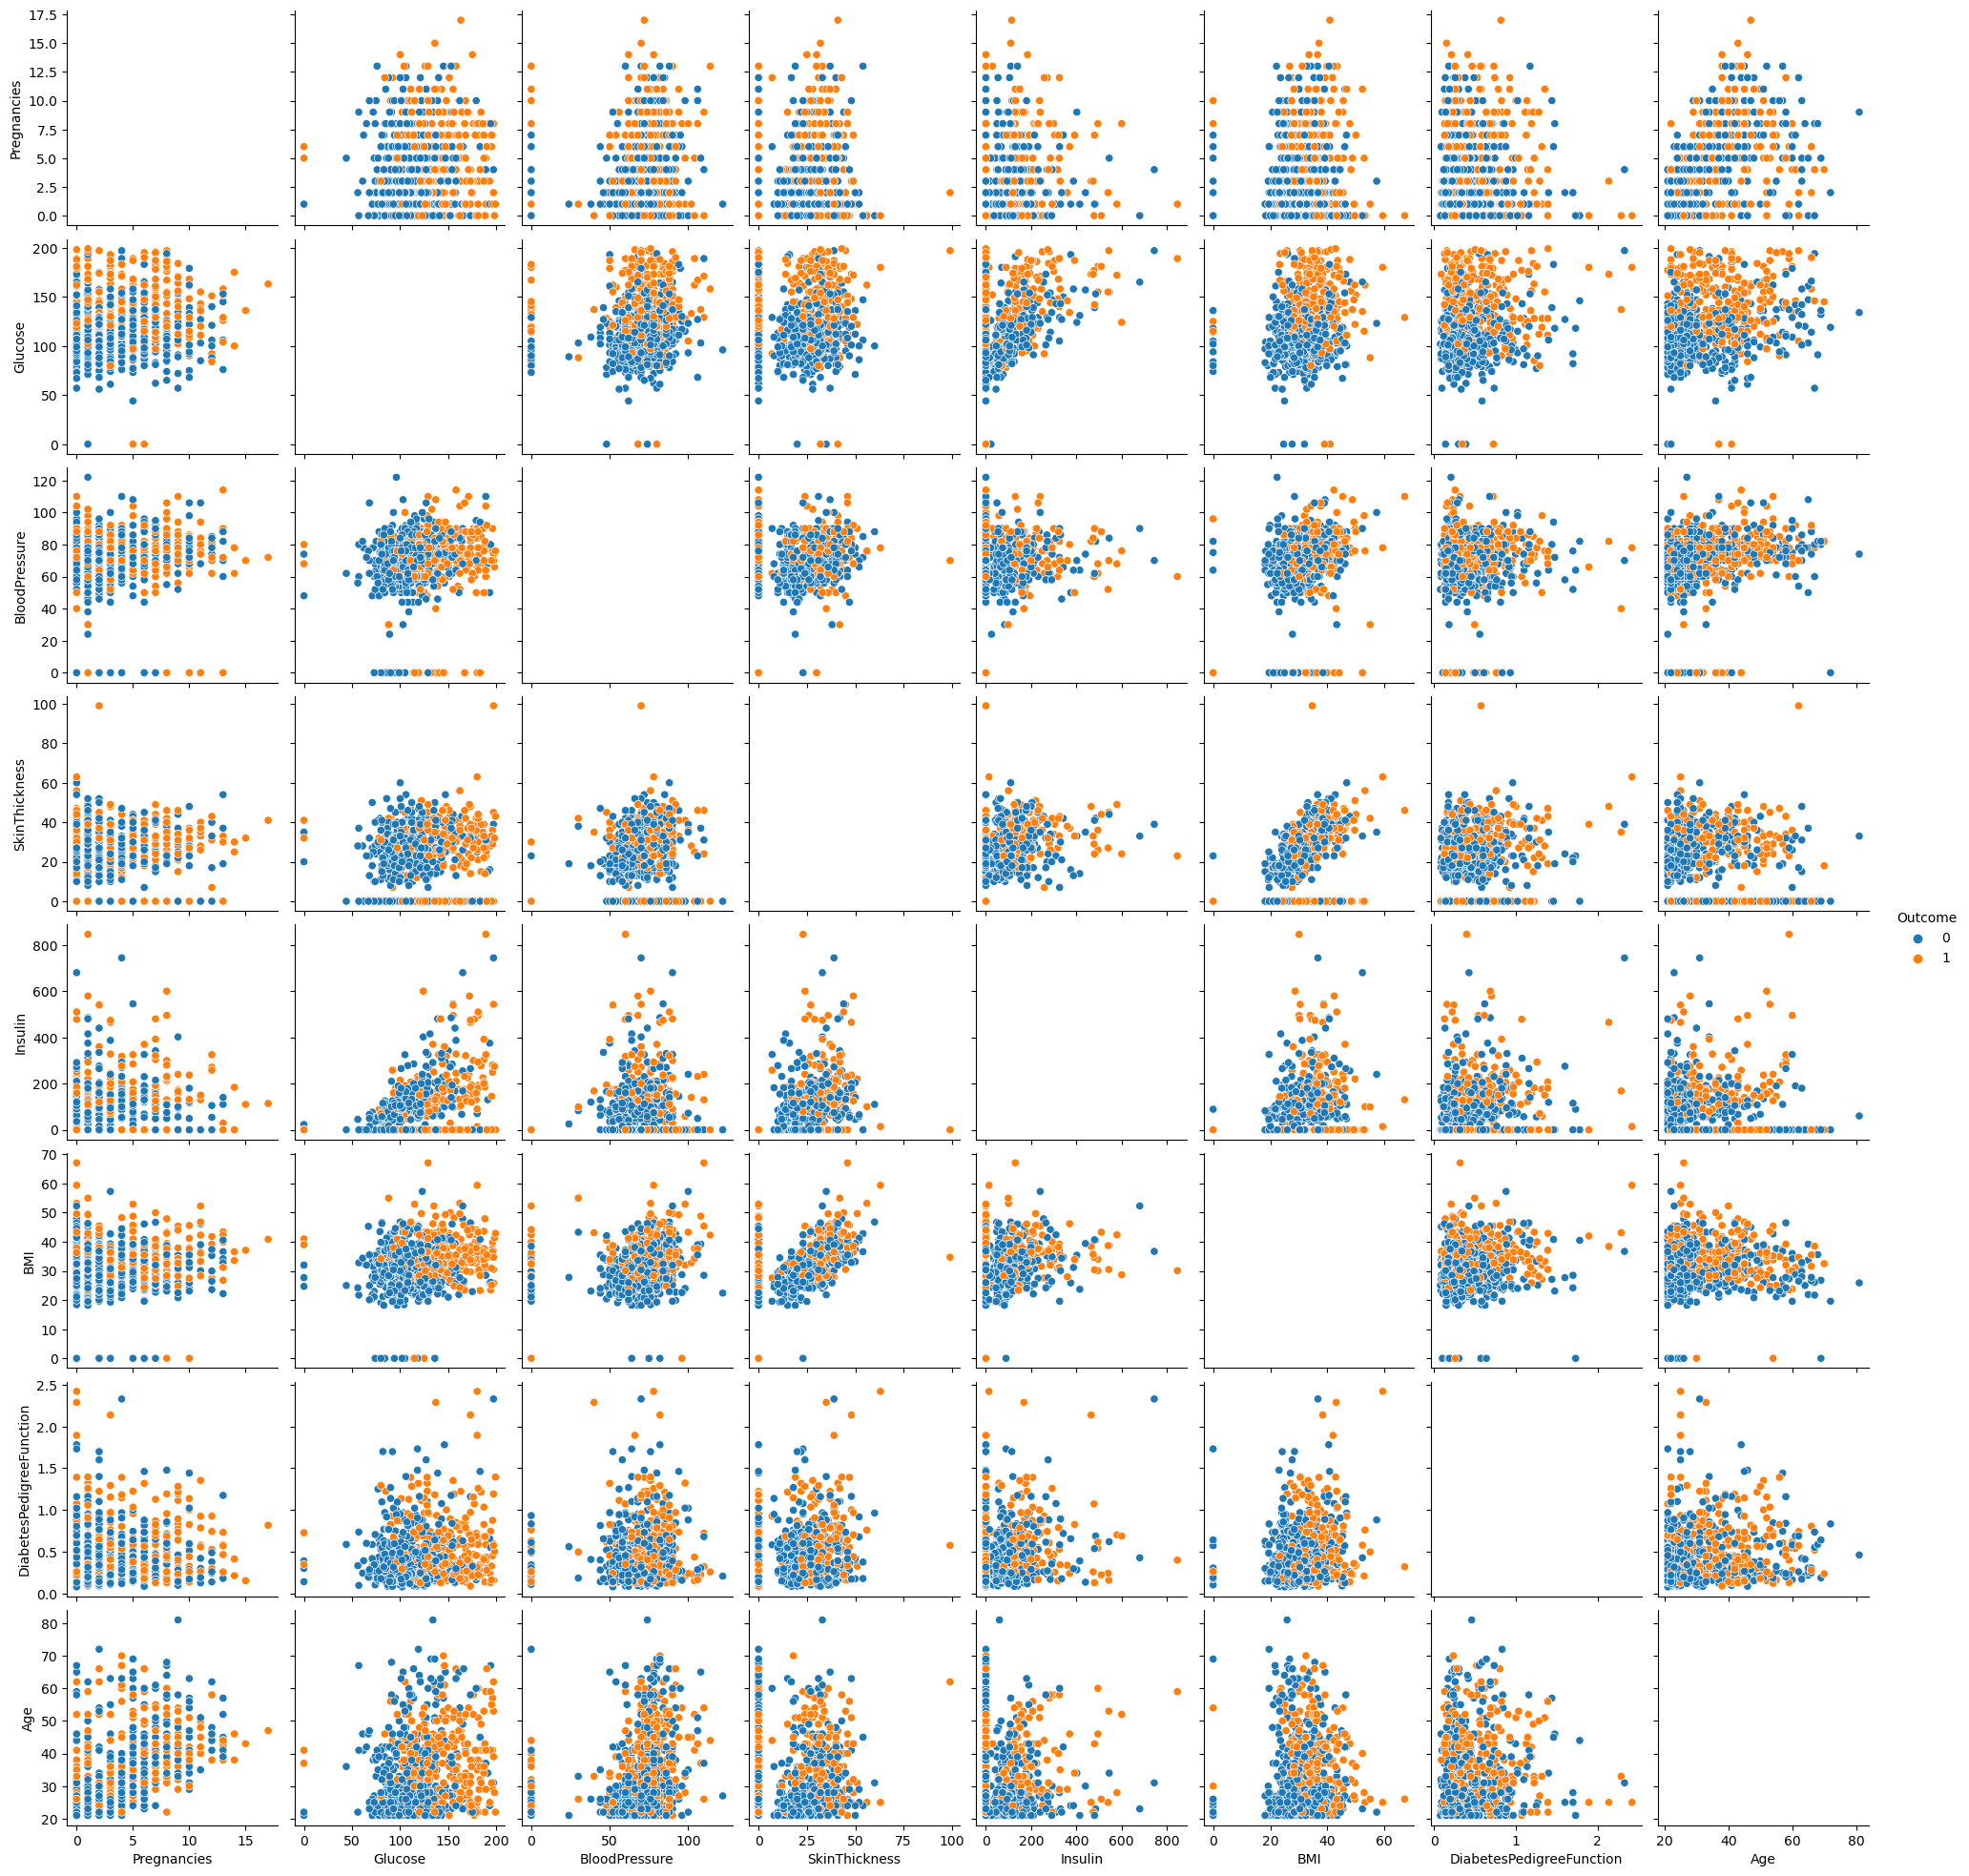

In [12]:
sns.pairplot(data, hue="Outcome", diag_kind="bar")

From the graph it can be clearly seen that `Glucose` is the most import feature in deciding the `Outcome`

### Splitting the dataset into training and test datasets

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Trying out various different models to decide which is the best one

Since this is a classification problem, we can use various classification models that Scikit provides, which are as follows :

* Decision Tree Classifier
* SGDClassifier
* RandomForestClassifier
* LogisticRegression
* GaussianNB

### Decision Tree Classifier

In [17]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training the model
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

# Predicting the test set
y_preds = model.predict(x_test)

#Evaluating the model
accuracy = accuracy_score(y_test, y_preds)
confusion = confusion_matrix(y_test, y_preds)
report = classification_report(y_test, y_preds)

print(f"Accuracy : {accuracy}")
print(f"Confusion Matrix : \n{confusion}")
print(f"Classification Report : {report}")

Accuracy : 0.7662337662337663
Confusion Matrix : 
[[77 22]
 [14 41]]
Classification Report :               precision    recall  f1-score   support

           0       0.85      0.78      0.81        99
           1       0.65      0.75      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154



### SGDClassifier

In [39]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training the model
model = SGDClassifier()
model.fit(x_train, y_train)

# Predicting the test set
y_preds = model.predict(x_test)

#Evaluating the model
accuracy = accuracy_score(y_test, y_preds)
confusion = confusion_matrix(y_test, y_preds)
report = classification_report(y_test, y_preds)

print(f"Accuracy : {accuracy}")
print(f"Confusion Matrix : \n{confusion}")
print(f"Classification Report : {report}")

Accuracy : 0.7207792207792207
Confusion Matrix : 
[[69 30]
 [13 42]]
Classification Report :               precision    recall  f1-score   support

           0       0.84      0.70      0.76        99
           1       0.58      0.76      0.66        55

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.72      0.73       154



### RandomForest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training the model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Predicting the test set
y_preds = model.predict(x_test)

#Evaluating the model
accuracy = accuracy_score(y_test, y_preds)
confusion = confusion_matrix(y_test, y_preds)
report = classification_report(y_test, y_preds)

print(f"Accuracy : {accuracy}")
print(f"Confusion Matrix : \n{confusion}")
print(f"Classification Report : {report}")

Accuracy : 0.7402597402597403
Confusion Matrix : 
[[79 20]
 [20 35]]
Classification Report :               precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training the model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predicting the test set
y_preds = model.predict(x_test)

#Evaluating the model
accuracy = accuracy_score(y_test, y_preds)
confusion = confusion_matrix(y_test, y_preds)
report = classification_report(y_test, y_preds)

print(f"Accuracy : {accuracy}")
print(f"Confusion Matrix : \n{confusion}")
print(f"Classification Report : {report}")

Accuracy : 0.7402597402597403
Confusion Matrix : 
[[78 21]
 [19 36]]
Classification Report :               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



### Naive bayes Classification - GaussianNB

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training the model
model = GaussianNB()
model.fit(x_train, y_train)

# Predicting the test set
y_preds = model.predict(x_test)

#Evaluating the model
accuracy = accuracy_score(y_test, y_preds)
confusion = confusion_matrix(y_test, y_preds)
report = classification_report(y_test, y_preds)

print(f"Accuracy : {accuracy}")
print(f"Confusion Matrix : \n{confusion}")
print(f"Classification Report : {report}")

Accuracy : 0.7662337662337663
Confusion Matrix : 
[[79 20]
 [16 39]]
Classification Report :               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



Comparing the accuracy of all the models :
    
* Decision Tree Classifier - 0.7662337662337663
* SGDClassifier            - 0.7207792207792207
* RandomForestClassifier   - 0.7402597402597403
* LogisticRegression       - 0.7402597402597403
* GaussianNB               - 0.7662337662337663

It is clear that GaussianNB and Decision Tree Classifier has the highest accuracy.

So let's chose `GuassianNB` for training our model.

### Improvising the model by Hyperparameter Tuning

In [42]:
model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds) :
    """
    Performs evaluation comparision on y_true labels vs. y_pred labels
    on a classification.
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy' : round(accuracy, 2),
                   'precision' : round(precision, 2),
                   'recall' : round(recall, 2),
                   'f1' : round(f1, 2)}
    print(f"Accuracy : {accuracy * 100:.2f}%")
    print(f"Precision : {precision:.2f}")
    print(f"Recall : {recall:.2f}")
    print(f"F1 score : {f1:.2f}")
    
    return metric_dict

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
import numpy as np

grid = {'var_smoothing': np.logspace(0,-9, num=100)}

np.random.seed(42)

model = GaussianNB()

rs_model = RandomizedSearchCV(estimator = model,
                              param_distributions = grid,
                              n_iter = 10, # number of models to try
                              cv = 5,
                              verbose = 2)

rs_model.fit(x_train, y_train);

rs_y_preds = rs_model.predict(x_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................var_smoothing=2.848035868435799e-08; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-08; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-08; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-08; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-08; total time=   0.0s
[CV] END ...............var_smoothing=1.5199110829529332e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.5199110829529332e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.5199110829529332e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.5199110829529332e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.5199110829529332e-05; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.32876128

It seems that we cannot improve the accuracy any further so let's stop.